# Prediction of metabolites by MicrobeRX

## Loading the modules and data files of MicrobeRX

Importing the prediction module of MicrobeRX

In [1]:
from microberx import MetabolitePredictor

MicrobeRX requires a database of reaction rules in order to predict. The program can only make predictions based on reaction rules; however, evidences of human and gut microbial biotransoformations have been included to help identify the origin of the metabolites.

Load the DataFiles module to load the evidences and reaction rules.

In [2]:
from microberx.DataFiles import load_human_evidences, load_microbes_evidences, load_reaction_rules

import pandas as pd 

The reaction rules and evidences are easily accessible as dataframes. Use these files as templates if you want to make predictions based on your own rules and evidences. MicrobeRX's functionality is dependent on these files.

In [3]:
HUMAN_EVIDENCES= load_human_evidences()
MICROBIOME_EVIDENCES= load_microbes_evidences()
RULES_DATABASE = load_reaction_rules()
RULES_DATABASE.head()

INFO: Loading human evidences...
INFO: Loading microbes evidences...
INFO: Loading reaction rules...


num_atoms                                               rule reaction_id  \
0          4  [#6&!R:35]-[#6&!R:36](=[#8&!R:37])-[#7&!R:42]>...  MNXR100024   
1          5  [#6&!R:34]-[#6&!R:35]-[#6&!R:36](=[#8&!R:37])-...  MNXR100024   
2          6  [#6&!R:33]-[#6&!R:34]-[#6&!R:35]-[#6&!R:36](=[...  MNXR100024   
3          8  [#7&+&!R:32]-[#6&!R:33](-[#6&!R:34]-[#6&!R:35]...  MNXR100024   
4         10  [#7&+&!R:32]-[#6&!R:33](-[#6&!R:34]-[#6&!R:35]...  MNXR100024   

  substrate                                      substrate_map     product  \
0    MNXM37  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  MNXM741173   
1    MNXM37  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  MNXM741173   
2    MNXM37  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  MNXM741173   
3    MNXM37  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  MNXM741173   
4    MNXM37  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  MNXM741173   

                                         product_map  
0  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  
1  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  
2  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  
3  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...  
4  [NH3+:32][CH:33]([CH2:34][CH2:35][C:36](=[O:37...

Along with the DataFiles, MicrobeRX includes a number of tools for analyzing and visualizing metabolites and evidences.

- Analyzer:
    - compute_molecular_descriptors
    - compute_isotopic_mass 
    - search_pubchem 
    - classify_molecules


- Visualizer:
    - plot_confidence_scores
    - plot_molecular_descriptors
    - plot_isotopic_masses
    - plot_metabolic_accesibility 
    - display_molecules 
    - plot_evidences

In [4]:
from microberx.MetaboliteAnalyzer import compute_molecular_descriptors, compute_isotopic_mass, search_pubchem, classify_molecules

from microberx.MetaboliteVisualizer import plot_confidence_scores, plot_molecular_descriptors, plot_isotopic_masses, plot_metabolic_accesibility, display_molecules, plot_relationships

Predictions can be made after the reaction rules have been loaded. MicrobeRX's ability to use evidence-based reaction rules is an important feature. For example, the dataframe of reaction rules can be easily filtered to include only human (Recon3D) and gut microbe reactions (AGORA2).

In [5]:
reaction_rules=RULES_DATABASE[RULES_DATABASE.reaction_id.isin(HUMAN_EVIDENCES.mnx_id.unique())]

In [6]:
reaction_rules=pd.concat([reaction_rules,RULES_DATABASE[RULES_DATABASE.reaction_id.isin(MICROBIOME_EVIDENCES.mnx_id.unique())]])
reaction_rules=pd.concat([reaction_rules,RULES_DATABASE[RULES_DATABASE.reaction_id.isin(MICROBIOME_EVIDENCES.source.unique())]])
reaction_rules.drop_duplicates(ignore_index=True,inplace=True)

Aside from rules, the query molecule is an important component for prediction. Because the program uses rdkit to handle molecules. The queries can be represented in a variety of formats. For instance, SMILE, SMARTS, InChi, and so on.

## Prediction of metabolites

Aside from rules, the query molecule is an important component for prediction. Because the program uses rdkit to handle molecules, the queries can be represented in a variety of formats. For instance, SMILE, SMARTS, InChi, and so on.

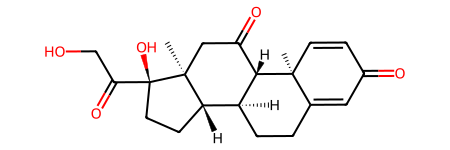

In [7]:
from rdkit import Chem

smi="[H][C@@]12CC[C@](O)(C(=O)CO)[C@@]1(C)CC(=O)[C@@]1([H])[C@@]2([H])CCC2=CC(=O)C=C[C@]12C"
name='Prednisone'
query=Chem.MolFromSmiles(smi)
query

Predictions can take from a few seconds to a few minutes, depending on the number of reaction rules used. For clarity, the program will display a progress bar.

In [8]:
Loader=MetabolitePredictor(rules_table=reaction_rules)
Loader.run_prediction(query,name=name)

  0%|          | 0/47083 [00:00<?, ?it/s]

The prediction module's main output is a dataframe containing detailed information about the rules used and the prediction performed. The main data is a column containing the predicted metabolite structures as SMILES (main product smiles) along with other relevant information. It is recommended that you explore the dataframe to become acquainted with this output.

In [9]:
metabolites=Loader.predicted_metabolites
metabolites.head(5)

main_product_smiles  \
0   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
1   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
2  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   
3  CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)C=CC4(C)C3C...   
4  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   

                           secondary_products_smiles  similarity_substrates  \
0  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
1  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
2  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.741   
3  CC(C)(COP(=O)([O-])OP(=O)([O-])OCC1OC(n2cnc3c(...                  0.729   
4  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.698   

   similarity_products                            reacting_atoms_in_query  \
0                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
1                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
2                0.752  [24, 18, 17, 16, 15, 14, 12, 11, 9, 10, 0, 1, ...   
3                0.761  [8, 7, 5, 6, 3, 4, 2, 1, 0, 15, 14, 12, 11, 9,...   
4                0.714    [15, 14, 12, 11, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7]   

  reaction_id   substrate     product  num_atoms  reacting_atoms_efficiency  \
0  MNXR145242  MNXM731048  MNXM730404         15                      0.577   
1  MNXR145244  MNXM731048  MNXM730404         15                      0.577   
2  MNXR102263  MNXM730450  MNXM728289         18                      0.692   
3  MNXR107765  MNXM730404    MNXM4531         15                      0.577   
4  MNXR158466  MNXM734569  MNXM730404         14                      0.538   

   confidence_score metabolite_id  
0             2.312  Prednisone_1  
1             2.312  Prednisone_1  
2             2.185  Prednisone_2  
3             2.067  Prednisone_3  
4             1.950  Prednisone_2

In [10]:
metabolites.to_csv('test/prednisone_metabolites.tsv',sep='\t',index=False)

NameError: name 'Fale' is not defined

## Analysis and Visualization

The ability to predict chemical structures is at the heart of MicrobeRX. As a result, the tool includes a number of fuctions for analyzing and visualizing the predicted metabolites.

The following sequence presents a possible analysis idea. However, the user can use the functions in any order that best suits their needs.

### Metabolic accesibility

This function creates a 2D image of a molecule with the atoms colored according to their metabolic accessibility, which is calculated as the frequency of the atom in the reacting_atoms_in_query column of the data frame. The function returns a matplotlib Figure object that can be displayed or modified. 

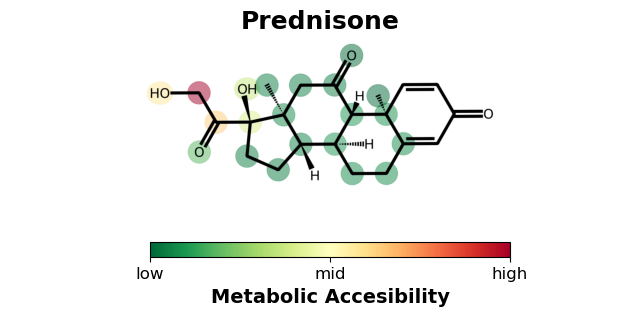

In [11]:
accesibility=plot_metabolic_accesibility(metabolites,molecule=query,atom_map_col='reacting_atoms_in_query',mol_name=name)

### Confidence score

This function creates a 3D scatter plot of the data frame with the x, y, and z axes representing the similarity of substrates, products, and reacting atoms efficiency respectively. The color of each point indicates the confidence score of the corresponding metabolite id. The function returns an interactive plotly Figure object that can be displayed or modified.

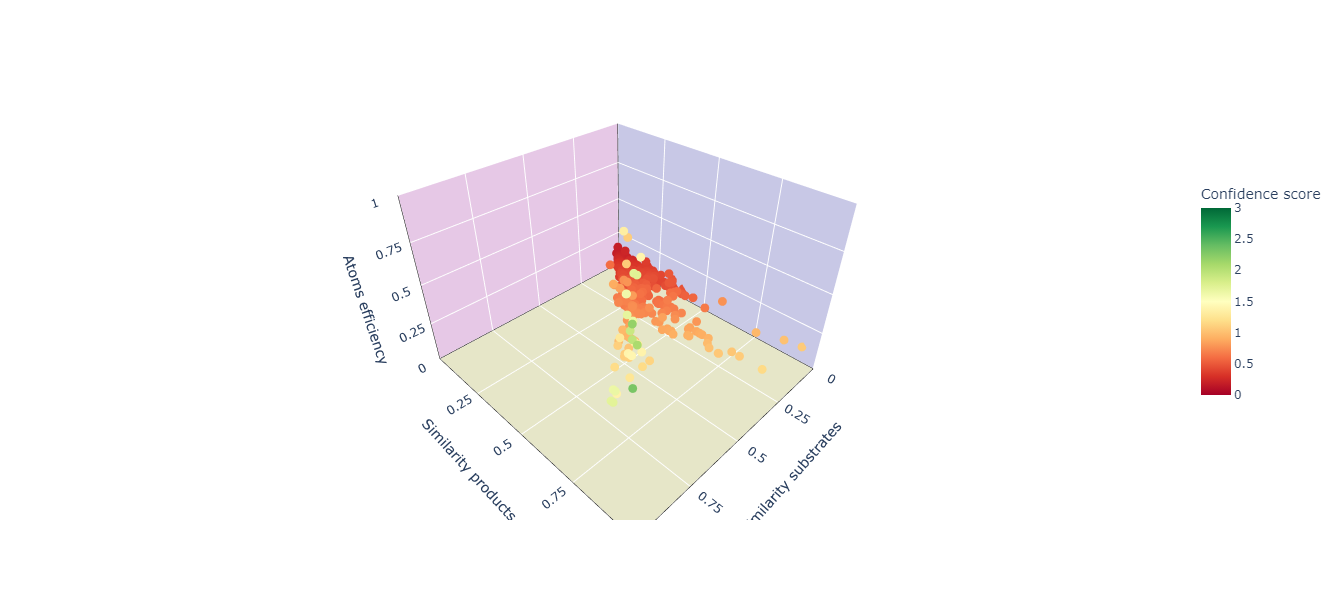

In [12]:
plot_confidence_scores(metabolites)

### Results manipulation

Because of the number of atoms used in reaction rules during the predictions. Predictions with varying levels of structural confidence can be obtained. The benefit of using data frames is that filtering and selecting results is very simple.

In [13]:
best_metabolites=metabolites[metabolites.confidence_score>=1.5]

In [14]:
unique_metabolites=best_metabolites.drop_duplicates(subset=['metabolite_id'],ignore_index=True)

### Plot relationships

This function generates a Sankey diagram to display the relationships between metabolite annotations in a data frame. This plot is especially interesting for analyzing the relationships between metabolites and evidences. An example will be shown later.

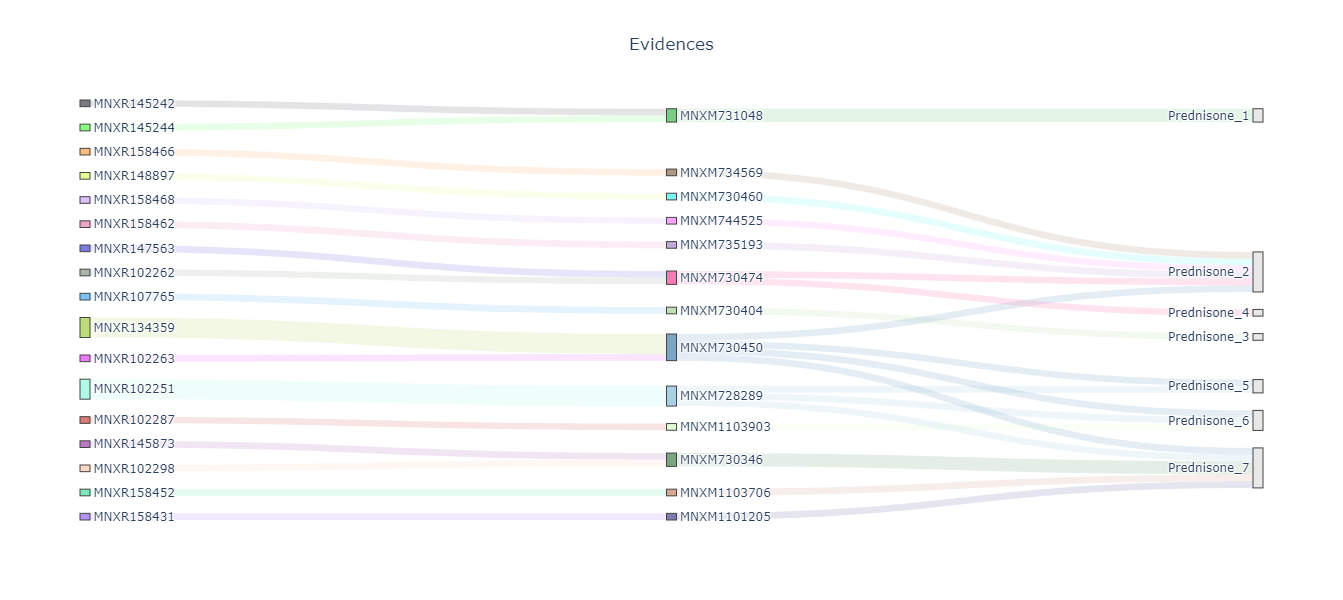

In [15]:
plot_relationships(best_metabolites,nodes=['reaction_id','substrate','metabolite_id'])

### Molecular descriptors

This function computes and plots common molecular descriptors for a given data frame using SMILES strings. The descriptors are added as new columns at the end of the dataframe.

In [16]:
descriptors=compute_molecular_descriptors(unique_metabolites,smiles_col='main_product_smiles')
descriptors.head()

main_product_smiles  \
0   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
1  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   
2  CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)C=CC4(C)C3C...   
3   CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(O)CO   
4  CC12C=CC(=O)C=C1CC(O)C1C2C(=O)CC2(C)C1CCC2(O)C...   

                           secondary_products_smiles  similarity_substrates  \
0  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
1  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.741   
2  CC(C)(COP(=O)([O-])OP(=O)([O-])OCC1OC(n2cnc3c(...                  0.729   
3  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.518   
4  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   

   similarity_products                            reacting_atoms_in_query  \
0                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
1                0.752  [24, 18, 17, 16, 15, 14, 12, 11, 9, 10, 0, 1, ...   
2                0.761  [8, 7, 5, 6, 3, 4, 2, 1, 0, 15, 14, 12, 11, 9,...   
3                0.571  [7, 5, 6, 3, 2, 1, 0, 15, 16, 17, 18, 24, 14, ...   
4                0.711                           [14, 15, 16, 17, 18, 24]   

  reaction_id   substrate     product  num_atoms  reacting_atoms_efficiency  \
0  MNXR145242  MNXM731048  MNXM730404         15                      0.577   
1  MNXR102263  MNXM730450  MNXM728289         18                      0.692   
2  MNXR107765  MNXM730404    MNXM4531         15                      0.577   
3  MNXR147563  MNXM730474  MNXM730815         17                      0.654   
4  MNXR102251  MNXM728289  MNXM730404          6                      0.231   

   confidence_score metabolite_id    MolWt   LogP  NumHAcceptors  NumHDonors  \
0             2.312  Prednisone_1  360.450  1.558            5.0         3.0   
1             2.185  Prednisone_2  374.433  1.084            6.0         3.0   
2             2.067  Prednisone_3  400.471  2.337            6.0         1.0   
3             1.743  Prednisone_4  360.450  1.558            5.0         3.0   
4             1.723  Prednisone_5  374.433  0.737            6.0         3.0   

   NumRotatableBonds    TPSA MolFormula  
0                2.0   94.83   C21H28O5  
1                2.0  111.90   C21H26O6  
2                3.0   97.74   C23H28O6  
3                2.0   94.83   C21H28O5  
4                2.0  111.90   C21H26O6

The function normalizes the molecular descriptors to fit in the range [0, 1] and then plots them as radial lines for each compound. The function also plots the upper and lower limits of the Lipinski's rule of five as shaded regions in orange and yellow, respectively. The function uses distinct colors for each compound and displays a legend on the right side of the plot.

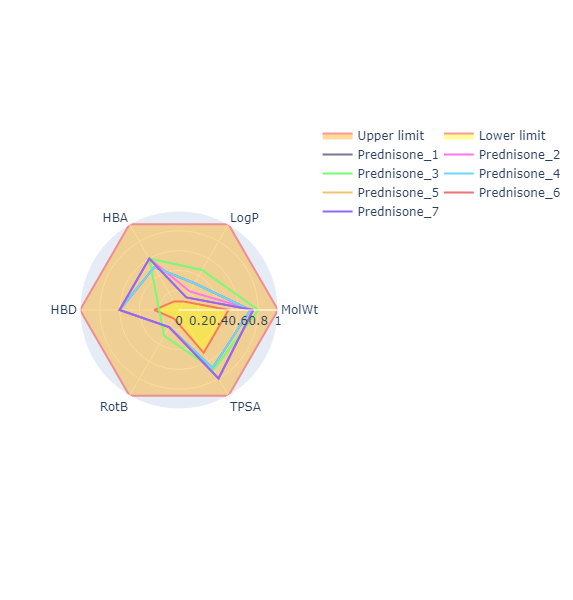

In [17]:
plot_molecular_descriptors(descriptors,names_col='metabolite_id')

### Isotopic masses

The function iterates over the rows of the data frame and uses the EmpiricalFormula class from pyOpenMS to create an object for each molecular formula. Then, it generates the isotopic mass distribution. It calculates the sum of the probabilities of all isotopes and stores it in the 'probability_sum' column. It also formats the mass and probability of each isotope as a string and stores it in the 'mass_distribution' column, separated by semicolons.

In [19]:
masses=compute_isotopic_mass(descriptors,molformula_col='MolFormula')
masses.head()

main_product_smiles  \
0   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
1  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   
2  CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)C=CC4(C)C3C...   
3   CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(O)CO   
4  CC12C=CC(=O)C=C1CC(O)C1C2C(=O)CC2(C)C1CCC2(O)C...   

                           secondary_products_smiles  similarity_substrates  \
0  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
1  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.741   
2  CC(C)(COP(=O)([O-])OP(=O)([O-])OCC1OC(n2cnc3c(...                  0.729   
3  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.518   
4  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   

   similarity_products                            reacting_atoms_in_query  \
0                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
1                0.752  [24, 18, 17, 16, 15, 14, 12, 11, 9, 10, 0, 1, ...   
2                0.761  [8, 7, 5, 6, 3, 4, 2, 1, 0, 15, 14, 12, 11, 9,...   
3                0.571  [7, 5, 6, 3, 2, 1, 0, 15, 16, 17, 18, 24, 14, ...   
4                0.711                           [14, 15, 16, 17, 18, 24]   

  reaction_id   substrate     product  num_atoms  reacting_atoms_efficiency  \
0  MNXR145242  MNXM731048  MNXM730404         15                      0.577   
1  MNXR102263  MNXM730450  MNXM728289         18                      0.692   
2  MNXR107765  MNXM730404    MNXM4531         15                      0.577   
3  MNXR147563  MNXM730474  MNXM730815         17                      0.654   
4  MNXR102251  MNXM728289  MNXM730404          6                      0.231   

   ...  metabolite_id    MolWt   LogP  NumHAcceptors  NumHDonors  \
0  ...   Prednisone_1  360.450  1.558            5.0         3.0   
1  ...   Prednisone_2  374.433  1.084            6.0         3.0   
2  ...   Prednisone_3  400.471  2.337            6.0         1.0   
3  ...   Prednisone_4  360.450  1.558            5.0         3.0   
4  ...   Prednisone_5  374.433  0.737            6.0         3.0   

   NumRotatableBonds    TPSA  MolFormula probability_sum  \
0                2.0   94.83    C21H28O5             1.0   
1                2.0  111.90    C21H26O6             1.0   
2                3.0   97.74    C23H28O6             1.0   
3                2.0   94.83    C21H28O5             1.0   
4                2.0  111.90    C21H26O6             1.0   

                                   mass_distribution  
0  360.1937:78.5875;361.197:18.2524;362.2004:2.83...  
1  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...  
2  400.1886:76.7392;401.1919:19.5123;402.1953:3.3...  
3  360.1937:78.5875;361.197:18.2524;362.2004:2.83...  
4  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...  

[5 rows x 21 columns]

This function plots the isotopic mass distribution of a given data frame using plotly.

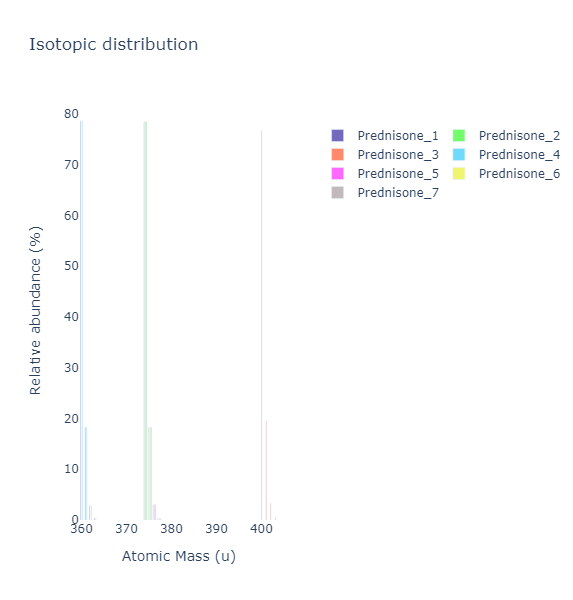

In [20]:
plot_isotopic_masses(masses,names_col='metabolite_id',mass_distribution_col='mass_distribution')

### PubChem identifiers

The function iterates over the rows of the data frame and uses the pubchempy library to query the PubChem database for compounds that match the identifier in the specified column and namespace. It extracts the CIDs, SIDs and synonyms of the matching compounds and stores them in the corresponding columns of the data frame.

This function sends an online request to the PubChem server in order to conduct the search. When performing this task, make sure you have an internet connection. Metabolite annotation could be a time-consuming process. It is best not to conduct searches on large numbers of molecules.

In [21]:
search_pubchem(masses,entry_col='main_product_smiles')

  0%|          | 0/7 [00:00<?, ?it/s]

INFO: 'PUGREST.NotFound'
INFO: 'PUGREST.NotFound'


main_product_smiles  \
0   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
1  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   
2  CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)C=CC4(C)C3C...   
3   CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(O)CO   
4  CC12C=CC(=O)C=C1CC(O)C1C2C(=O)CC2(C)C1CCC2(O)C...   
5  CC12C=CC(=O)C=C1C(O)CC1C2C(=O)CC2(C)C1CCC2(O)C...   
6  CC12C=CC(=O)C=C1CCC1C2C(=O)C(O)C2(C)C1CCC2(O)C...   

                           secondary_products_smiles  similarity_substrates  \
0  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
1  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.741   
2  CC(C)(COP(=O)([O-])OP(=O)([O-])OCC1OC(n2cnc3c(...                  0.729   
3  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.518   
4  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   
5  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   
6  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   

   similarity_products                            reacting_atoms_in_query  \
0                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
1                0.752  [24, 18, 17, 16, 15, 14, 12, 11, 9, 10, 0, 1, ...   
2                0.761  [8, 7, 5, 6, 3, 4, 2, 1, 0, 15, 14, 12, 11, 9,...   
3                0.571  [7, 5, 6, 3, 2, 1, 0, 15, 16, 17, 18, 24, 14, ...   
4                0.711                           [14, 15, 16, 17, 18, 24]   
5                0.710                           [24, 18, 17, 16, 15, 14]   
6                0.702                             [0, 9, 11, 12, 14, 15]   

  reaction_id   substrate     product  num_atoms  reacting_atoms_efficiency  \
0  MNXR145242  MNXM731048  MNXM730404         15                      0.577   
1  MNXR102263  MNXM730450  MNXM728289         18                      0.692   
2  MNXR107765  MNXM730404    MNXM4531         15                      0.577   
3  MNXR147563  MNXM730474  MNXM730815         17                      0.654   
4  MNXR102251  MNXM728289  MNXM730404          6                      0.231   
5  MNXR102251  MNXM728289  MNXM730404          6                      0.231   
6  MNXR102251  MNXM728289  MNXM730404          6                      0.231   

   ...  NumHAcceptors NumHDonors  NumRotatableBonds    TPSA  MolFormula  \
0  ...            5.0        3.0                2.0   94.83    C21H28O5   
1  ...            6.0        3.0                2.0  111.90    C21H26O6   
2  ...            6.0        1.0                3.0   97.74    C23H28O6   
3  ...            5.0        3.0                2.0   94.83    C21H28O5   
4  ...            6.0        3.0                2.0  111.90    C21H26O6   
5  ...            6.0        3.0                2.0  111.90    C21H26O6   
6  ...            6.0        3.0                2.0  111.90    C21H26O6   

   probability_sum                                  mass_distribution  \
0              1.0  360.1937:78.5875;361.197:18.2524;362.2004:2.83...   
1              1.0  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...   
2              1.0  400.1886:76.7392;401.1919:19.5123;402.1953:3.3...   
3              1.0  360.1937:78.5875;361.197:18.2524;362.2004:2.83...   
4              1.0  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...   
5              1.0  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...   
6              1.0  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...   

   PubChem_CID                PubChem_SID  \
0         4894    4500855;7996730;8153012   
1     86210504                              
2       539225   7698251;8675577;39364481   
3      3382688  4502144;36229691;75263968   
4         None                              
5         None                              
6         None                              

                                    PubChem_Synonyms  
0  11,17,21-Trihydroxypregna-1,4-diene-3,20-dione...  
1                                           

### Molecular classification

Classify molecules based on their SMILES strings.

This function submits a query to the ClassyFire web service and returns a data frame with the classification results. This function sends an online request to the ClassyFire server in order to conduct the search. When performing this task, make sure you have an internet connection.

In [22]:
classification=classify_molecules(masses,smiles_col='main_product_smiles',names_col='metabolite_id')
classification

main_product_smiles  \
0   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
1  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   
2  CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)C=CC4(C)C3C...   
3   CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(O)CO   
4  CC12C=CC(=O)C=C1CC(O)C1C2C(=O)CC2(C)C1CCC2(O)C...   
5  CC12C=CC(=O)C=C1C(O)CC1C2C(=O)CC2(C)C1CCC2(O)C...   
6  CC12C=CC(=O)C=C1CCC1C2C(=O)C(O)C2(C)C1CCC2(O)C...   

                           secondary_products_smiles  similarity_substrates  \
0  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
1  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.741   
2  CC(C)(COP(=O)([O-])OP(=O)([O-])OCC1OC(n2cnc3c(...                  0.729   
3  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.518   
4  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   
5  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   
6  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   

   similarity_products                            reacting_atoms_in_query  \
0                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
1                0.752  [24, 18, 17, 16, 15, 14, 12, 11, 9, 10, 0, 1, ...   
2                0.761  [8, 7, 5, 6, 3, 4, 2, 1, 0, 15, 14, 12, 11, 9,...   
3                0.571  [7, 5, 6, 3, 2, 1, 0, 15, 16, 17, 18, 24, 14, ...   
4                0.711                           [14, 15, 16, 17, 18, 24]   
5                0.710                           [24, 18, 17, 16, 15, 14]   
6                0.702                             [0, 9, 11, 12, 14, 15]   

  reaction_id   substrate     product  num_atoms  reacting_atoms_efficiency  \
0  MNXR145242  MNXM731048  MNXM730404         15                      0.577   
1  MNXR102263  MNXM730450  MNXM728289         18                      0.692   
2  MNXR107765  MNXM730404    MNXM4531         15                      0.577   
3  MNXR147563  MNXM730474  MNXM730815         17                      0.654   
4  MNXR102251  MNXM728289  MNXM730404          6                      0.231   
5  MNXR102251  MNXM728289  MNXM730404          6                      0.231   
6  MNXR102251  MNXM728289  MNXM730404          6                      0.231   

   ...  PubChem_CID                PubChem_SID  \
0  ...         4894    4500855;7996730;8153012   
1  ...     86210504                              
2  ...       539225   7698251;8675577;39364481   
3  ...      3382688  4502144;36229691;75263968   
4  ...         None                              
5  ...         None                              
6  ...         None                              

                                    PubChem_Synonyms            kingdom  \
0  11,17,21-Trihydroxypregna-1,4-diene-3,20-dione...  Organic compounds   
1                                                     Organic compounds   
2  MLS002638169;CHEMBL1715582;DTXSID10871607;HMS3...                NaN   
3  20beta-Dihydroprednisone;20alpha-Dihydropredni...                NaN   
4                                                                   NaN   
5                                                                   NaN   
6                                                                   NaN   

                        superclass                             class  \
0  Lipids and lipid-like molecules  Steroids and steroid derivatives   
1  Lipids and lipid-like molecules  Steroids and steroid derivatives   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   
5                              NaN                               NaN   
6                              NaN                               NaN   

            subclass                                      direct_parent  \
0    Hydroxysteroids                           

### Display molecules and data

This function displays a grid of molecules from a data frame, using different colors to indicate the values of a specified column.

In [23]:
display_molecules(classification,columns_to_display=['reaction_id','PubChem_CID','kingdom','superclass'])

MolGridWidget()

### Relationships

The use of standardized Recon3D and AGORA2 reactions enables the use of high-quality annotations of the biotransformations included in MicrobeRX. The following example provides an interesting and straightforward analysis of the relationships between predicted metabolites and the enzymes and organisms that produce them.

In [24]:
ALL_EVIDENCES=pd.concat([HUMAN_EVIDENCES,MICROBIOME_EVIDENCES],ignore_index=True)

In [25]:
EVIDENCES_METANETX=ALL_EVIDENCES.groupby('mnx_id')[['source','name','ec','origin','xrefs']].agg(lambda x: ';'.join([i for i in set(x) if isinstance(i,str)])).reset_index()
EVIDENCES_METANETX

mnx_id                        source  \
0          MNXR01                                 
1          MNXR02                        EX_h_e   
2          MNXR03  Htg;Htr;Htx;Ht;Htmi;HMR_1095   
3      MNXR100000                     GALNACT5g   
4      MNXR100001                NAGA2ly;GALNTg   
...           ...                           ...   
10823   MNXR99982                        GALGT4   
10824   MNXR99995                     GALNACT1g   
10825   MNXR99997                     GALNACT2g   
10826   MNXR99998                     GALNACT3g   
10827   MNXR99999                     GALNACT4g   

                                                    name ec origin  \
0                                                            Human   
1                                            H+ exchange     Human   
2      Proton diffusion;H transporter, endoplasmic re...     Human   
3      Uridine diphosphoacetylgalactosamine-chondroit...     Human   
4      N-acetylgalactosaminidase, alpha-;GalNAc trans...     Human   
...                                                  ... ..    ...   
10823         Beta-1,4 N-acetylgalactosaminyltransferase     Human   
10824  UDPGal-chondroitin acetylgalactosaminyltransfe...     Human   
10825  Uridine diphosphoacetylgalactosamine-chondroit...     Human   
10826  Uridine diphosphoacetylgalactosamine-chondroit...     Human   
10827  Uridine diphosphoacetylgalactosamine-chondroit...     Human   

                                                   xrefs  
0                                                         
1      mnx:MNXR02;MNXR02;bigg.reaction:EX_h_e;bigg.re...  
2      mnx:MNXR03;MNXR03;bigg.reaction:HMR_1095;bigg....  
3      biggR:GALNACT5g;bigg.reaction:GALNACT5g;bigg.r...  
4      biggR:GALNTg;bigg.reaction:GALNTg;bigg.reactio...  
...                                                  ...  
10823  biggR:GALGT4;bigg.reaction:GALGT4;bigg.reactio...  
10824  biggR:GALNACT1g;bigg.reaction:GALNACT1g;bigg.r...  
10825  biggR:GALNACT2g;bigg.reaction:GALNACT2g;bigg.r...  
10826  biggR:GALNACT3g;bigg.reaction:GALNACT3g;bigg.r...  
10827  biggR:GALNACT4g;bigg.reaction:GALNACT4g;bigg.r...  

[10828 rows x 6 columns]

In [26]:
evidences=masses.merge(EVIDENCES_METANETX,left_on='reaction_id',right_on='mnx_id',how='inner')
evidences.head()

main_product_smiles  \
0   CC12C=CC(=O)C=C1CCC1C2C(O)CC2(C)C1CCC2(O)C(=O)CO   
1  CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(=O...   
2  CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)C=CC4(C)C3C...   
3   CC12C=CC(=O)C=C1CCC1C2C(=O)CC2(C)C1CCC2(O)C(O)CO   
4  CC12C=CC(=O)C=C1CC(O)C1C2C(=O)CC2(C)C1CCC2(O)C...   

                           secondary_products_smiles  similarity_substrates  \
0  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.867   
1  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.741   
2  CC(C)(COP(=O)([O-])OP(=O)([O-])OCC1OC(n2cnc3c(...                  0.729   
3  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.518   
4  NC(=O)c1ccc[n+](C2OC(COP(=O)([O-])OP(=O)([O-])...                  0.781   

   similarity_products                            reacting_atoms_in_query  \
0                0.868  [24, 18, 17, 16, 15, 14, 12, 13, 11, 9, 10, 0,...   
1                0.752  [24, 18, 17, 16, 15, 14, 12, 11, 9, 10, 0, 1, ...   
2                0.761  [8, 7, 5, 6, 3, 4, 2, 1, 0, 15, 14, 12, 11, 9,...   
3                0.571  [7, 5, 6, 3, 2, 1, 0, 15, 16, 17, 18, 24, 14, ...   
4                0.711                           [14, 15, 16, 17, 18, 24]   

  reaction_id   substrate     product  num_atoms  reacting_atoms_efficiency  \
0  MNXR145242  MNXM731048  MNXM730404         15                      0.577   
1  MNXR102263  MNXM730450  MNXM728289         18                      0.692   
2  MNXR107765  MNXM730404    MNXM4531         15                      0.577   
3  MNXR147563  MNXM730474  MNXM730815         17                      0.654   
4  MNXR102251  MNXM728289  MNXM730404          6                      0.231   

   ...                                  mass_distribution PubChem_CID  \
0  ...  360.1937:78.5875;361.197:18.2524;362.2004:2.83...        4894   
1  ...  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...    86210504   
2  ...  400.1886:76.7392;401.1919:19.5123;402.1953:3.3...      539225   
3  ...  360.1937:78.5875;361.197:18.2524;362.2004:2.83...     3382688   
4  ...  374.1729:78.4197;375.1763:18.2252;376.1797:2.9...        None   

                 PubChem_SID  \
0    4500855;7996730;8153012   
1                              
2   7698251;8675577;39364481   
3  4502144;36229691;75263968   
4                              

                                    PubChem_Synonyms      mnx_id  \
0  11,17,21-Trihydroxypregna-1,4-diene-3,20-dione...  MNXR145242   
1                                                     MNXR102263   
2  MLS002638169;CHEMBL1715582;DTXSID10871607;HMS3...  MNXR107765   
3  20beta-Dihydroprednisone;20alpha-Dihydropredni...  MNXR147563   
4                                                     MNXR102251   

               source                                               name  \
0   HMR_1996;HSD11B1r  11-beta-hydroxysteroid dehydrogenase type 1;11...   
1  P45021A2r;HMR_1988    Steroid 21-Monooxygenase;Steroid 21-hydroxylase   
2          ACCOACORAT            Acetyl-CoA:cortisol O-acetyltransferase   
3              AKR1C1  Aldo-keto reductase family 1, member C1 (chlor...   
4          P45011B12m                        Steroid 11-beta-hydroxylase   

                         ec      origin  \
0         1.1.1.-;1.1.1.146       Human   
1        1.14.13;1.14.99.10       Human   
2                            GutMicrobe   
3  1.1.1;1.1.1.149;1.1.1.62       Human   
4                 1.14.15.4       Human   

                                               xrefs  
0  keggR:R02836;bigg.reaction:HMR_1996;bigg.react...  
1  seedR:rxn26985;bigg.reaction:HMR_1988;bigg.rea...  
2                                                     
3  rheaR:42112;bigg.reaction:AKR1C1;bigg.reaction...  
4  seedR:rxn26986;bigg.reaction:P45011B12m;bigg.r...  

[5 rows x 30 columns]

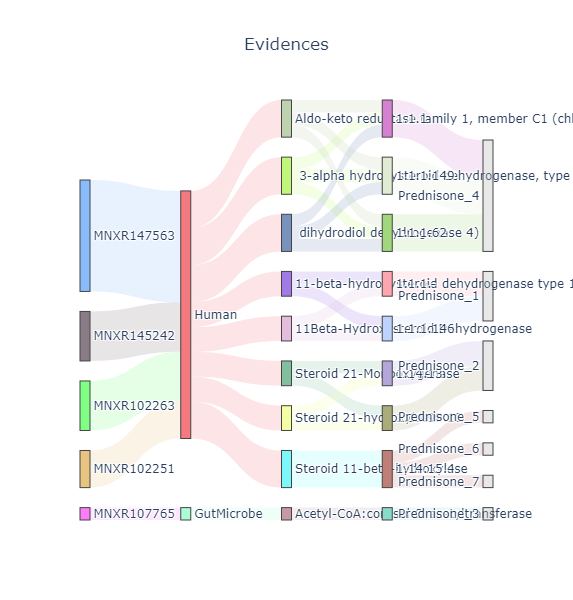

In [27]:
plot_relationships(evidences,nodes=['reaction_id','origin','name','ec','metabolite_id'])

In [ ]:
evidences.to_csv('test/prednisone_evidences.tsv',sep='\t',index=False)